In [18]:
import warnings
warnings.filterwarnings(action='ignore')

import os

import numpy as np
import pandas as pd
import seaborn as sb

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 사용
from tensorflow.keras.layers import Dense       # 전결합
from tensorflow.keras.layers import Dropout     # 특정 node를 사용안함.
from tensorflow.keras.callbacks import EarlyStopping   # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 우수한 학습 모델 파일 저장
from tensorflow.keras import regularizers 
from tensorflow.keras.utils import to_categorical   # one-hot 엔코딩

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋의 분리 지원
from sklearn.model_selection import StratifiedKFold  # K겹 교차 검증

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline  


In [2]:
df = pd.read_csv('./iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
print(type(df))
print(df.head())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 5)


<function matplotlib.pyplot.show(*args, **kw)>

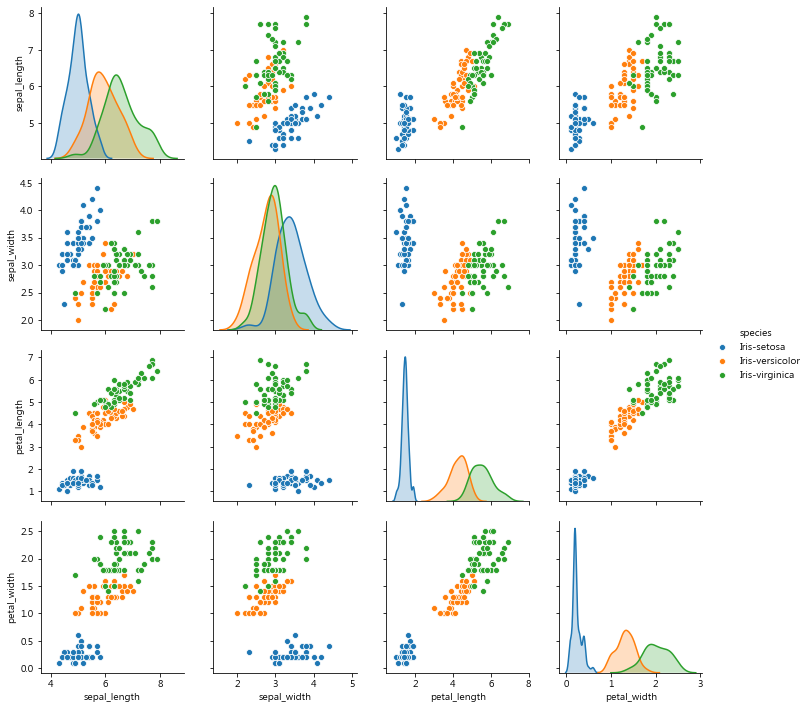

In [3]:
# 상관관계 확인
sb.pairplot(df, hue='species')
plt.show

In [4]:
data = df.values
print(type(data))
print(len(data))
print(data.shape)
X = data[:, 0:4].astype(float)
Y_str = data[:, 4]
print(Y_str)

<class 'numpy.ndarray'>
150
(150, 5)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolo

In [5]:
encoder = LabelEncoder()
encoder.fit(Y_str)
Y = encoder.transform(Y_str)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# 품종이 3가지인경우 그 품종에 속할 확률도 3가지가 출력됨.
# 품종이 10만가지이면 그 품종에 속할 확률도 0 ~ 1 사이의 값으로
# 10만가지가 출력됨.
# 머신러닝에서는 종류의 갯수만큼 출력 갯수가 선언되어야함.
# LabelEncoder에 의해서 vector화된 값
# Iris-setosa       0
# Iris-versicolor   1
# Iris-virginica    2

Y_encoded = to_categorical(Y) # one-hot-encoding
print(X[0])         # Iris-setosa  0  [5.1 3.5 1.4 0.2]
print(Y[0])         # 1이 위치할 인덱스로 사용
print(Y_encoded[0]) # 폼좀의 갯수가 3개임으로 [1. 0. 0.], 10만개이면 1또는 0이 10만개가됨 

[5.1 3.5 1.4 0.2]
0
[1. 0. 0.]


In [7]:
print(X[50])         # Iris-versicolor  1  [5.9 3.2 4.8 1.8]
print(Y[50])     
print(Y_encoded[50]) # [0. 1. 0.]

[5.  2.  3.5 1. ]
1
[0. 1. 0.]


In [8]:
print(X[100])         # Iris-virginica  2  [7.4 2.8 6.1 1.9]
print(Y[100]) 
print(Y_encoded[100]) # [0. 0. 1.]

[6.5 3.2 5.1 2. ]
2
[0. 0. 1.]


In [9]:
print(X.shape)
print(Y.shape)
print(Y_encoded.shape)

(150, 4)
(150,)
(150, 3)


In [10]:
# train_test_split 분할을 통한 훈련, 검증, 테스트 데이터의 분리
seed = 0
# 90%: 분할대기, 10%: 테스트
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y_encoded,
                                                        stratify=Y_encoded,
                                                        test_size=0.1,
                                                        random_state=seed)
# 나머지 데이터 90%를 분할, 90%: 훈련, 10%: 테스트
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.1,
                                                  random_state=seed)

print(y_val)
print(y_val.shape)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
(14, 3)


In [16]:
print(y_train[0:5])

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [11]:
model = Sequential()

# 네트워크 구성
# model.add(Dense(64, input_shape=4, activation='relu')
model.add(Dense(64, input_shape=(4, ), activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(32, activation='relu')) # 입력: 64, 출력: 32 
model.add(Dense(3, activation='softmax')) # 0 ~ 1 사이의 확률, 총합은 1
model.compile(optimizer='adam', loss='categorical_crossentropy', 
                                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=10)
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1000, 
                 batch_size=10, callbacks=[early_stopping])

Train on 121 samples, validate on 14 samples
Epoch 1/1000
121/121 [==============================] - 1s 6ms/sample - loss: 1.0675 - accuracy: 0.5702 - val_loss: 0.9749 - val_accuracy: 0.8571
Epoch 2/1000
121/121 [==============================] - 0s 258us/sample - loss: 0.9349 - accuracy: 0.9008 - val_loss: 0.8736 - val_accuracy: 0.8571
Epoch 3/1000
121/121 [==============================] - 0s 377us/sample - loss: 0.8513 - accuracy: 0.8926 - val_loss: 0.8037 - val_accuracy: 0.8571
Epoch 4/1000
121/121 [==============================] - 0s 240us/sample - loss: 0.7907 - accuracy: 0.9091 - val_loss: 0.7442 - val_accuracy: 0.9286
Epoch 5/1000
121/121 [==============================] - 0s 223us/sample - loss: 0.7175 - accuracy: 0.8430 - val_loss: 0.6882 - val_accuracy: 0.8571
Epoch 6/1000
121/121 [==============================] - 0s 231us/sample - loss: 0.6648 - accuracy: 0.8760 - val_loss: 0.6294 - val_accuracy: 0.9286
Epoch 7/1000
121/121 [==============================] - 0s 223us/samp

Epoch 56/1000
121/121 [==============================] - 0s 207us/sample - loss: 0.1355 - accuracy: 0.9421 - val_loss: 0.0550 - val_accuracy: 1.0000
Epoch 57/1000
121/121 [==============================] - 0s 207us/sample - loss: 0.1331 - accuracy: 0.9504 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 58/1000
121/121 [==============================] - 0s 215us/sample - loss: 0.1314 - accuracy: 0.9421 - val_loss: 0.0528 - val_accuracy: 1.0000
Epoch 59/1000
121/121 [==============================] - 0s 207us/sample - loss: 0.1214 - accuracy: 0.9752 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 60/1000
121/121 [==============================] - 0s 215us/sample - loss: 0.1223 - accuracy: 0.9752 - val_loss: 0.0511 - val_accuracy: 1.0000
Epoch 61/1000
121/121 [==============================] - 0s 215us/sample - loss: 0.1407 - accuracy: 0.9587 - val_loss: 0.0510 - val_accuracy: 1.0000
Epoch 62/1000
121/121 [==============================] - 0s 215us/sample - loss: 0.1230 - accuracy: 0.9669

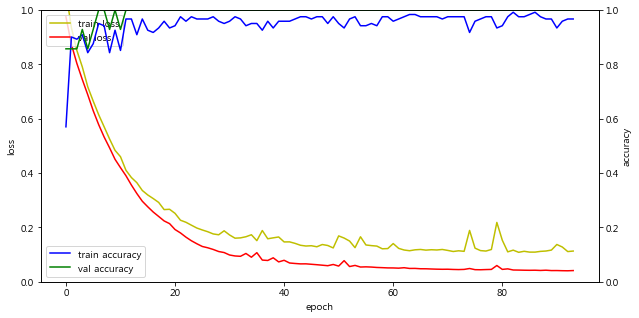

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.0]) # 값을 반영하여 변경

# 오른쪽 y 축 설정
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

# 축 레이블 설정
loss_ax.set_xlabel('epoch' )  # 학습 횟수
loss_ax.set_ylabel('loss')    # 왼쪽 y 축 레이블, 오차
acc_ax.set_ylabel('accuracy') # 오른쪽 y 축 레이블,정확도

loss_ax.legend(loc='upper left') # 왼쪽 y 축 오차 레이블 위치
acc_ax.legend(loc='lower left')  # 오른쪽 y 축 정확도 레이블 위치

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.04132226734821286 /정확도: 100.0 %


In [14]:
model.save('./Iris.h5')

In [15]:
# Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2
pd = model.predict(x_test) # 테스트 데이터
print('pd.shape:', pd.shape) #150건에 10%
print('데이터:', x_test[0])
print('예측값:', pd[0])  # 0 ~ 1사이의 실수값
print(y_test[0])
print(np.argmax(pd[0]))  # 가장 큰값의 index
# class 출력안됨.


pd.shape: (15, 3)
데이터: [6.7 3.1 4.4 1.4]
예측값: [4.0189418e-04 9.9878758e-01 8.1061228e-04]
[0. 1. 0.]
1


### 테스트 데이터 새로 준비하여 진행

In [ ]:
model = load_model('./Iris.h5')

In [19]:
df = pd.read_csv('./iris_test.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.0          3.5           1.3          0.3  Iris-setosa
1           4.5          2.3           1.3          0.3  Iris-setosa
2           4.4          3.2           1.3          0.2  Iris-setosa
3           5.0          3.5           1.6          0.6  Iris-setosa
4           5.1          3.8           1.9          0.4  Iris-setosa


In [20]:
data = df.values
print(type(data))
print(len(data))
print(data.shape)
X = data[:, 0:4].astype(float)
Y_str = data[:, 4]
print(Y_str)

<class 'numpy.ndarray'>
30
(30, 5)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']


In [24]:
encoder = LabelEncoder()
encoder.fit(Y_str)
Y = encoder.transform(Y_str)
print(Y)
Y_encoded = to_categorical(Y)
print(Y_encoded[0])
print(Y_encoded[10])
print(Y_encoded[20])

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]


In [29]:
pd = model.predict(X) # 테스트 데이터
print('pd.shape:', pd.shape) #150건에 10%
print('데이터:', X[0])
print('예측값:', pd[0])  # 0 ~ 1사이의 실수값
print('one-hot-encoded:',Y[0])
print(np.argmax(pd[0]))  # 가장 큰값의 index
print(Y_str[0])

pd.shape: (30, 3)
데이터: [5.  3.5 1.3 0.3]
예측값: [9.9998438e-01 1.5610656e-05 1.8148552e-12]
one-hot-encoded: 0
0
Iris-setosa


In [34]:
for item in pd:
    print(item)
    print('최대값:', np.max(item), ' / index:', np.argmax(item))

[9.9998438e-01 1.5610656e-05 1.8148552e-12]
최대값: 0.9999844  / index: 0
[9.9916625e-01 8.3374098e-04 2.3176014e-09]
최대값: 0.99916625  / index: 0
[9.9995685e-01 4.3162836e-05 2.1971806e-11]
최대값: 0.99995685  / index: 0
[9.9982882e-01 1.7112044e-04 7.0031515e-11]
최대값: 0.9998288  / index: 0
[9.9990594e-01 9.4003881e-05 1.8764839e-11]
최대값: 0.99990594  / index: 0
[9.9987698e-01 1.2300197e-04 6.0934938e-11]
최대값: 0.999877  / index: 0
[9.9998760e-01 1.2456402e-05 8.9196722e-13]
최대값: 0.9999876  / index: 0
[9.9994838e-01 5.1629606e-05 2.0938853e-11]
최대값: 0.9999484  / index: 0
[9.999906e-01 9.388260e-06 4.572939e-13]
최대값: 0.9999906  / index: 0
[9.9997103e-01 2.8941009e-05 4.3960248e-12]
최대값: 0.99997103  / index: 0
[2.4570417e-04 9.9878472e-01 9.6949330e-04]
최대값: 0.9987847  / index: 1
[3.2290048e-04 9.9539256e-01 4.2846240e-03]
최대값: 0.99539256  / index: 1
[1.5903718e-04 9.8824000e-01 1.1600918e-02]
최대값: 0.98824  / index: 1
[7.2915736e-04 9.2932904e-01 6.9941804e-02]
최대값: 0.92932904  / index: 1
[2.457

In [36]:
# softmax 함수의 값이 1이되는지 확인
# 컴퓨터는 내부적으로 정산연산이라 미세한 오차 발생
for item in pd:
    print(item, ' 합계:', np.sum(item))


[9.9998438e-01 1.5610656e-05 1.8148552e-12]  합계: 1.0
[9.9916625e-01 8.3374098e-04 2.3176014e-09]  합계: 1.0
[9.9995685e-01 4.3162836e-05 2.1971806e-11]  합계: 1.0
[9.9982882e-01 1.7112044e-04 7.0031515e-11]  합계: 0.99999994
[9.9990594e-01 9.4003881e-05 1.8764839e-11]  합계: 0.99999994
[9.9987698e-01 1.2300197e-04 6.0934938e-11]  합계: 1.0
[9.9998760e-01 1.2456402e-05 8.9196722e-13]  합계: 1.0
[9.9994838e-01 5.1629606e-05 2.0938853e-11]  합계: 1.0
[9.999906e-01 9.388260e-06 4.572939e-13]  합계: 1.0
[9.9997103e-01 2.8941009e-05 4.3960248e-12]  합계: 1.0
[2.4570417e-04 9.9878472e-01 9.6949330e-04]  합계: 0.9999999
[3.2290048e-04 9.9539256e-01 4.2846240e-03]  합계: 1.0000001
[1.5903718e-04 9.8824000e-01 1.1600918e-02]  합계: 0.99999994
[7.2915736e-04 9.2932904e-01 6.9941804e-02]  합계: 1.0
[2.4572620e-04 9.6808124e-01 3.1673051e-02]  합계: 1.0
[4.0596561e-04 9.3004388e-01 6.9550075e-02]  합계: 0.99999994
[2.4029870e-04 9.7354263e-01 2.6217066e-02]  합계: 1.0
[0.00364917 0.995141   0.00120983]  합계: 1.0
[2.9067282e-04 9.9

In [37]:
# Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2
def decode(data):  # data: 1차원 배열, predict는 2차원 배열을 리턴함
    index = np.argmax(data)
    if index == 0:
        label = 'Iris-setosa'
    elif index == 1:
        label = 'Iris-versicolor'
    elif index == 2:
        label = 'Iris-virginica'
        
    return label    

In [38]:
print(len(pd))
for i in range(len(pd)):
    print('Target(실제값):', Y_str[i], ' Y hat(예측값):', decode(pd[i]))

30
Target(실제값): Iris-setosa  Y hat(예측값): Iris-setosa
Target(실제값): Iris-setosa  Y hat(예측값): Iris-setosa
Target(실제값): Iris-setosa  Y hat(예측값): Iris-setosa
Target(실제값): Iris-setosa  Y hat(예측값): Iris-setosa
Target(실제값): Iris-setosa  Y hat(예측값): Iris-setosa
Target(실제값): Iris-setosa  Y hat(예측값): Iris-setosa
Target(실제값): Iris-setosa  Y hat(예측값): Iris-setosa
Target(실제값): Iris-setosa  Y hat(예측값): Iris-setosa
Target(실제값): Iris-setosa  Y hat(예측값): Iris-setosa
Target(실제값): Iris-setosa  Y hat(예측값): Iris-setosa
Target(실제값): Iris-versicolor  Y hat(예측값): Iris-versicolor
Target(실제값): Iris-versicolor  Y hat(예측값): Iris-versicolor
Target(실제값): Iris-versicolor  Y hat(예측값): Iris-versicolor
Target(실제값): Iris-versicolor  Y hat(예측값): Iris-versicolor
Target(실제값): Iris-versicolor  Y hat(예측값): Iris-versicolor
Target(실제값): Iris-versicolor  Y hat(예측값): Iris-versicolor
Target(실제값): Iris-versicolor  Y hat(예측값): Iris-versicolor
Target(실제값): Iris-versicolor  Y hat(예측값): Iris-versicolor
Target(실제값): Iris-versicolor  Y h

In [41]:
# input 함수의 사용
# 5.1,3.5,1.4,0.2
src = input('꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이를 입력하세요.')
print(type(src))
print(src)

꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이를 입력하세요.3.5, 6, 2.4, 3
<class 'str'>
3.5, 6, 2.4, 3


In [42]:
data = np.array(src.split(','), dtype=float) # 1차원 텐서
print(data.shape)
print(data)
X = np.array([data]) # 2차원 텐서(배열)로 변환
print(X.shape)
print(X)
pd = model.predict(X)  # 2차원 배열 대입
print('pd:', pd)

for i in range(len(pd)):
    print('예측값:', decode(pd[i]))

(4,)
[3.5 6.  2.4 3. ]
(1, 4)
[[3.5 6.  2.4 3. ]]
pd: [[0.3223662  0.67664206 0.00099169]]
예측값: Iris-versicolor
